In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/resume-dataset")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 383k/383k [00:01<00:00, 320kB/s]

Extracting files...
Path to dataset files: C:\Users\Mohak\.cache\kagglehub\datasets\gauravduttakiit\resume-dataset\versions\1


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df=pd.read_csv('UpdatedResumeDataset.csv')

In [69]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [71]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

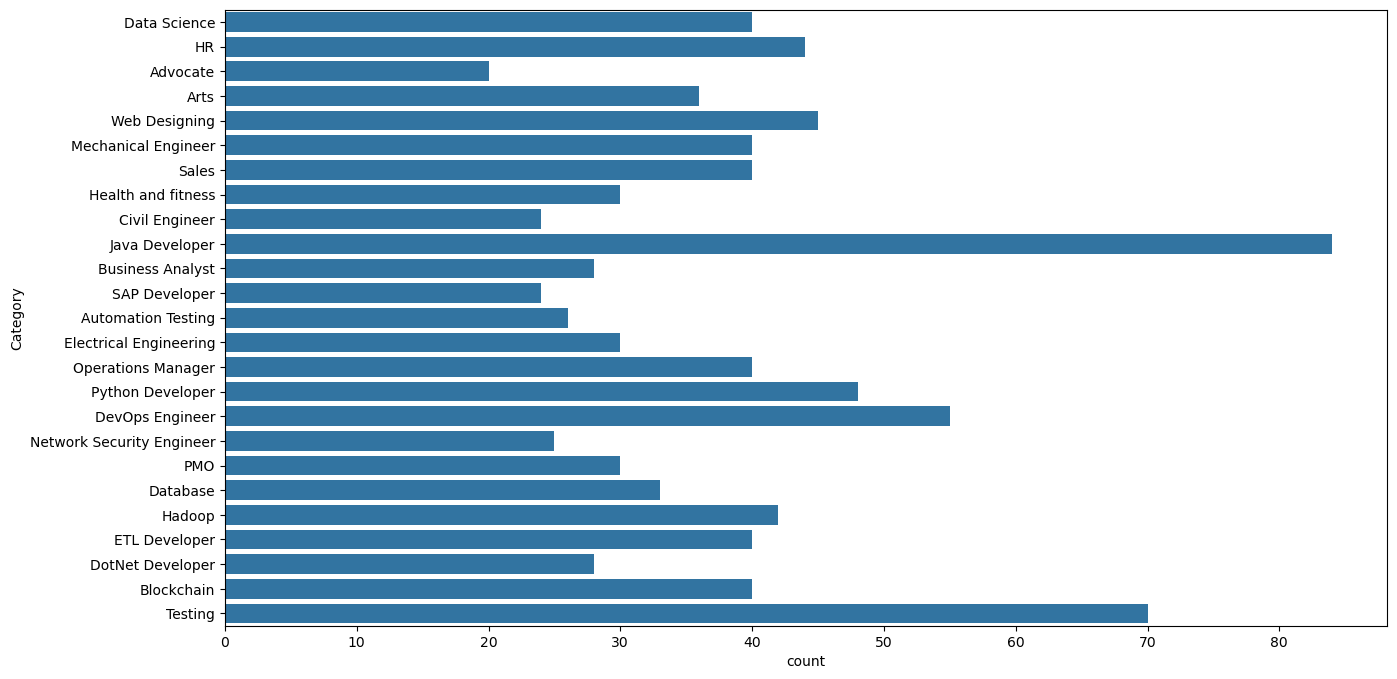

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(df['Category'])
plt.show()

In [73]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [75]:
import re

def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)  # Remove URLs
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)  # Remove hashtags
    cleanText = re.sub(r'@\S+', ' ', cleanText)  # Remove mentions
    cleanText = re.sub(r'RT|cc', ' ', cleanText)  # Remove RT and cc
    cleanText = re.sub(r'[{}]'.format(re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~""")), ' ', cleanText)  # Remove special characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  # Remove non-ASCII characters
    cleanText = re.sub(r'\s+', ' ', cleanText)  # Replace multiple spaces with a single space
    return cleanText.strip()  # Return the cleaned text


In [77]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [79]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [81]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [85]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(stop_words='english')
tfid.fit(df['Resume'])
VectorizedText=tfid.transform(df['Resume'])

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(VectorizedText,df['Category'],test_size=0.2,random_state=42)

In [95]:
X_train.shape

(769, 7351)

In [97]:
X_test.shape

(193, 7351)

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.9844559585492227


In [109]:
import pickle
pickle.dump(tfid,open('tfid,pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [111]:
myresume ="""A highly skilled Data Scientist with over 2 years of practical experience in delivering innovative, data-driven solutions and advanced analytics across industries. Proficient in Python, SQL, and machine learning libraries such as scikit-learn and TensorFlow, with expertise in implementing algorithms for regression, classification, clustering, and dimensionality reduction. Demonstrated proficiency in natural language processing (NLP) for tasks like sentiment analysis, topic modeling (LDA, NMF), and chatbot development. Skilled in visualizing complex data using Tableau, matplotlib, and D3.js to drive actionable insights.

Key accomplishments include designing a Fraud Analytics Platform to detect anomalies in ERP systems, leading to improved fraud detection accuracy, and developing end-to-end text analytics solutions for customer feedback analysis using word embeddings and sentiment classification. Experienced in integrating tools like Elasticsearch and Kibana for information governance, ensuring data security and efficiency. Known for building predictive models and interactive dashboards, significantly enhancing operational workflows and decision-making processes. Passionate about leveraging machine learning and AI to solve real-world problems and deliver impactful business outcomes."""

In [121]:
clf=pickle.load(open('clf.pkl','rb'))
cleanedResume=cleanResume(myresume)
input_features=tfid.transform([cleanedResume])
prediction_id=clf.predict(input_features)[0]

category_mapping={
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}
category_name=category_mapping.get(prediction_id,"Unknown Profession")
print("Predicted Category:", category_name)


Predicted Category: Data Science
